# Wstęp do Sztucznej Inteligencji - rok akademicki 2019/2020

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `{NrAlbumu}_{Nazwisko}_{Imie}_{PoprzedniaNazwa}`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia.

# Temat: Wnioskowanie oparte na wiedzy niepewnej. Wnioskowanie bayesowskie
Zapoznaj się z treścią niniejszego notatnika czytając i wykonując go komórka po komórce. Wykonaj napotkane zadania/ćwiczenia.

In [6]:
!pip install pymc3==3.8 arviz

In [8]:
import pymc3 as pm
import arviz as az
import numpy as np
print('Pymc3 version:', pm.__version__)
print('Arviz version:', az.__version__)

Pymc3 version: 3.8
Arviz version: 0.7.0


## Zadanie 1  (obowiązkowe, 5pkt.)
Zapożyczone z ćwiczeń do wykładu [Arabas, Cichosz](http://wazniak.mimuw.edu.pl/index.php?title=Sztuczna_inteligencja/SI_%C4%86wiczenia_4)

### Zamodeluj i odpowiedz na pytania.

W śledztwie dotyczącym zabójstwa inspektor Bayes rozważa dwie hipotezy:

- $H_1$ główny podejrzany zabił,
- $H_2$ główny podejrzany nie zabił, 

oraz następujące możliwe fakty:

- $E_1$ na miejscu zbrodni znaleziono odciski palców głównego podejrzanego,
- $E_2$ główny podejrzany nie ma alibi na czas popełnienia zabójstwa,
- $E_3$ główny podejrzany miał motyw zabicia ofiary,
- $E_4$ główny podejrzany był widziany w sądziedztwie miejsca, w którym mieszka nielegalny handlarz bronią,
- $E_5$ świadek zbrodni podał rysopis zabójcy nie pasujący do głównego podejrzanego. 

Zależności między takimi faktami a hipotezami opisują następujące prawdopodobieństwa:

$P(E_1|H_1)=0.7,\qquad P(E_1|H_2)=0.3,$

$P(E_2|H_1)=0.8,\qquad P(E_2|H_2)=0.4,$

$P(E_3|H_1)=0.9,\qquad P(E_3|H_2)=0.5,$

$P(E_4|H_1)=0.4,\qquad P(E_4|H_2)=0.2,$

$P(E_5|H_1)=0.2,\qquad P(E_5|H_2)=0.4.$ 

__W którym przypadku prawdopodobieństwo popełnienia zabójstwa byłoby największe?__

1. Gdyby znaleziono na miejscu zbrodni jego odciski palców.
2. Gdyby stwierdzono, że nie miał alibi i miał motyw.
3. Gdyby znaleziono na miejscu zbrodni jego odciski palców oraz stwierdzono, że był widziany w sąsiedztwie miejsca, w którym mieszka nielegalny handlarz bronią, ale świadek zbrodni podał rysopis zabójcy nie pasujący do głównego podejrzanego.

### TWÓJ PROGRAM:

Multiprocess sampling (2 chains in 2 jobs)
BinaryGibbsMetropolis: [zabojstwo, odciski, alibi, motyw, miejsce, rysopis]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 3000/3000 [00:08<00:00, 356.87draws/s]
C:\Users\kokol\anaconda3\lib\site-packages\pymc3\plots\__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


0.7105517909002904
0.819848975188781
0.6875


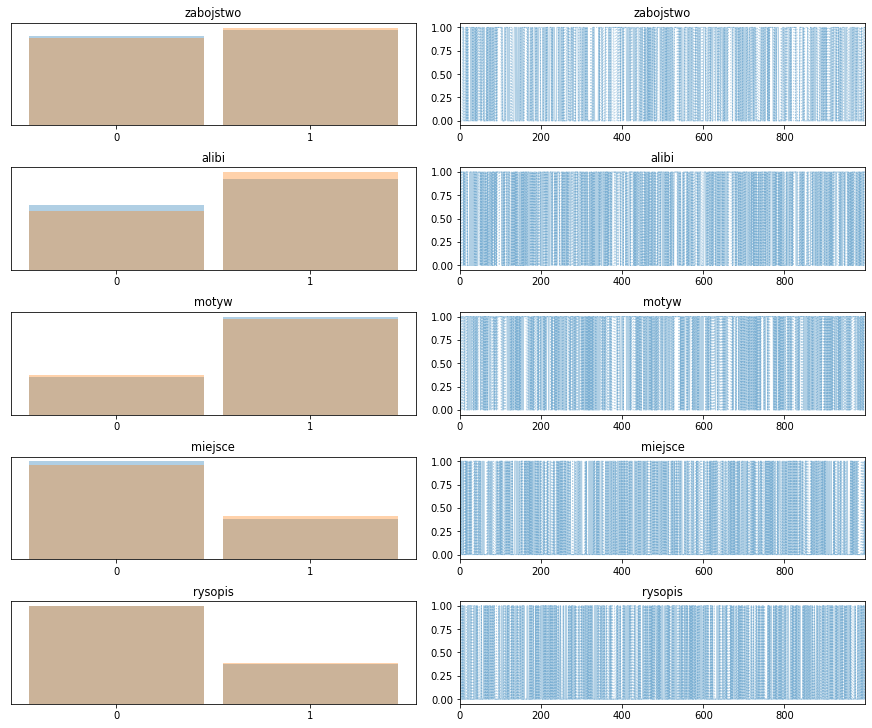

In [9]:
import pymc3 as pm
import arviz as az
import numpy as np
with pm.Model() as zadanie_1:
    
    zabojstwo = pm.Bernoulli('zabojstwo',0.5)
    

    p_odciski=pm.Deterministic('p_odciski',pm.math.switch(zabojstwo,0.7,0.3))
    odciski=pm.Bernoulli('odciski',p_odciski)
   
    #alibi
    p_alibi=pm.Deterministic('p_alibi',pm.math.switch(zabojstwo,0.8,0.4))
    alibi=pm.Bernoulli('alibi',p_alibi)
   
    #Prawdopodobienstwo posiadania motywu
    p_motyw=pm.Deterministic('p_motyw',pm.math.switch(zabojstwo,0.9,0.5))
    motyw=pm.Bernoulli('motyw',p_motyw)
   
    #Prawdopodobienstwo ze podejrzany byl u handlarza bronią
    p_miejsce=pm.Deterministic('p_miejsce',pm.math.switch(zabojstwo,0.4,0.2))
    miejsce=pm.Bernoulli('miejsce',p_miejsce)
   
    #Prawdopodobienstwo ze rysopis nie pasuje
    p_rysopis=pm.Deterministic('p_rysopis',pm.math.switch(zabojstwo,0.2,0.4))
    rysopis=pm.Bernoulli('rysopis',p_rysopis)
with zadanie_1:
    trace=pm.sample(1000, cores=2)
pm.traceplot(trace,varnames=['zabojstwo','alibi','motyw','miejsce','rysopis'])
 

print((trace['odciski']*trace['zabojstwo']).sum()/(trace['odciski']).sum())
print((trace['alibi']*trace['motyw']*trace['zabojstwo']).sum()/(trace['alibi']*trace['motyw']).sum())
print((trace['zabojstwo']*trace['odciski']*trace['rysopis']*trace['miejsce']).sum()/(trace['odciski']*trace['rysopis']*trace['miejsce']).sum())

 



### ODPOWIEDŹ:

Najwieksze prawdo jest na to ze popełnił zbrodnie Gdyby stwierdzono, że nie miał alibi i miał motyw.

## Zadanie 2  (obowiązkowe, 5pkt.)

### Zamodeluj i odpowiedz na pytania.
System alarmowy w mieszkaniu, reaguje na włamania oraz, niestety, również na drobne trzęsienia (ziemi). Sąsiedzi John i Mary są umówieni, żeby zadzwonić do właściciela gdy usłyszą alarm. John jest nadgorliwy i bierze różne zdarzenia (np. dzwonek telefonu) za sygnał alarmowy (i wtedy zawsze dzwoni). Mary rozpoznaje alarm poprawnie, lecz często słucha głośnej muzyki i może go w ogóle nie usłyszeć. 

Sieć przekonań dla systemu alarmowego wygląda następująco:
![bsiec.PNG](http://torus.uck.pk.edu.pl/~amarsz/images/bsiec.PNG)

__Jakie jest prawdopodobieństwo, że:__
1. włączy się alarm?
2. doszło do włamanie jeśli wiadom, że włączył się alarm?
3. zdarzyło się trzęsienie ziemi jeśli wiadomo, żę włączył się alarm?
1. w razie włamania ktoś zadzwoni?
2. zawiadomienie o włamaniu jest fałszywe?
3. rozległ się alarm, przy czym nie wystąpiło ani trzęsienie ziemi ani włamanie, ale oboje John i Mary zadzwonili? (prawd. bezwarunkowe)

TWÓJ PROGRAM:

Sequential sampling (1 chains in 1 job)
BinaryGibbsMetropolis: [Burglary, Earthquake, alarm, john, mary]
Sampling chain 0, 0 divergences: 100%|██████████████████████████████████████████| 10500/10500 [00:43<00:00, 243.57it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


Wlaczy sie alarm na: 0.0034
doszło do włamanie jeśli wiadom, że włączył się alarm: 0.17647058823529413
zdarzyło się trzęsienie ziemi jeśli wiadomo, żę włączył się alarm 0.5588235294117647
w razie włamania ktoś zadzwoni 0.75
zawiadomienie o włamaniu jest fałszywe 0.06234987990392314
zległ się alarm... 0.0003


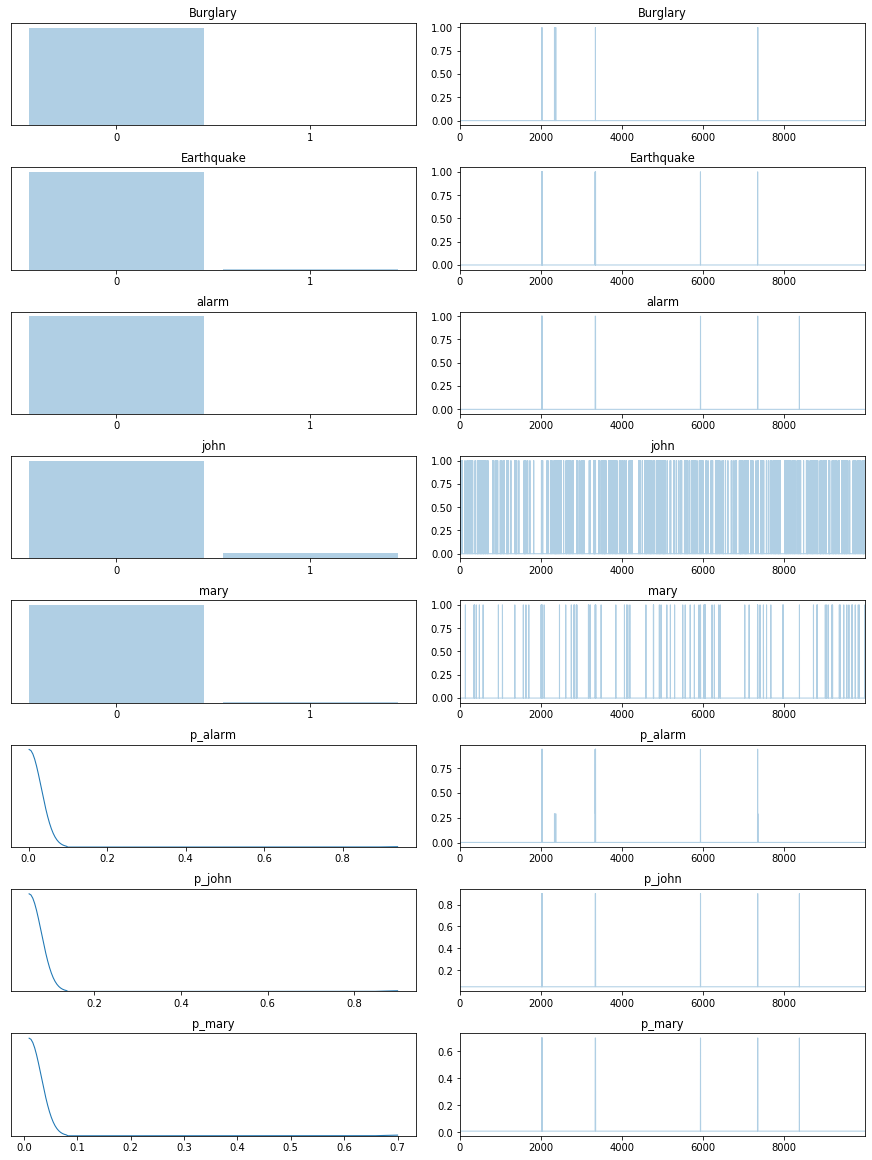

In [15]:
with pm.Model() as model:
    Burglary = pm.Bernoulli('Burglary', 0.001)
    Earthquake=pm.Bernoulli("Earthquake",0.002)
    p_alarm = pm.Deterministic('p_alarm', pm.math.switch(Burglary, pm.math.switch(Earthquake,0.95, 0.29),pm.math.switch(Earthquake, 0.94, 0.001)))
    alarm=pm.Bernoulli("alarm",p_alarm)
    p_john=pm.Deterministic('p_john', pm.math.switch(alarm, 0.90, 0.05))
    john=pm.Bernoulli("john",p_john)
    p_mary=pm.Deterministic('p_mary', pm.math.switch(alarm, 0.70, 0.01))
    mary=pm.Bernoulli("mary",p_mary)

    trace = pm.sample(10000, chains=1)
    pm.traceplot(trace)
    p_1 = trace['alarm'].sum()/len(trace['alarm'])
    p_2=(trace['alarm']*trace['Burglary']).sum()/trace['alarm'].sum()
    p_3=(trace['alarm']*trace['Earthquake']).sum()/trace['alarm'].sum()
    p_4=(trace['Burglary']*np.logical_not(np.logical_not(trace['john'])*np.logical_not(trace['mary']))).sum()/trace['Burglary'].sum()
    p_5=(np.logical_not(trace['Burglary'])*np.logical_not(np.logical_not(trace['john'])*np.logical_not(trace['mary']))).sum()/np.logical_not(trace['Burglary']).sum()
    p_6=(trace['alarm']*np.logical_not(trace['Burglary'])*np.logical_not(trace['Earthquake'])*trace['john']*trace['mary']).sum()/len(trace['alarm']*np.logical_not(trace['Burglary'])*np.logical_not(trace['Earthquake'])*trace['john']*trace['mary'])
    print('Wlaczy sie alarm na:',p_1,)
    print('doszło do włamanie jeśli wiadom, że włączył się alarm:',p_2)
    print('zdarzyło się trzęsienie ziemi jeśli wiadomo, żę włączył się alarm',p_3)
    print('w razie włamania ktoś zadzwoni',p_4)
    print('zawiadomienie o włamaniu jest fałszywe',p_5)
    print('zległ się alarm...',p_6)

### ODPOWIEDŹ:

Wlaczy sie alarm na: 0.0034
doszło do włamanie jeśli wiadom, że włączył się alarm: 0.17647058823529413
zdarzyło się trzęsienie ziemi jeśli wiadomo, żę włączył się alarm 0.5588235294117647
w razie włamania ktoś zadzwoni 0.75
zawiadomienie o włamaniu jest fałszywe 0.06234987990392314
zległ się alarm... 0.0003

__UWAGA:__ Zwróć uwagę na wielkości podanych prawdopodobieńst aby dobarć odpowiednią liczbę symulacji.

&copy; Katedra Informatyki, Politechnika Krakowska